In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import expit


In [2]:

df = pd.read_csv("penguins_size.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            220 non-null    object 
 1   island             220 non-null    object 
 2   culmen_length_mm   219 non-null    float64
 3   culmen_depth_mm    219 non-null    float64
 4   flipper_length_mm  219 non-null    float64
 5   body_mass_g        219 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [4]:
df.isna().sum()

species              0
island               0
culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  6
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            214 non-null    object 
 1   island             214 non-null    object 
 2   culmen_length_mm   214 non-null    float64
 3   culmen_depth_mm    214 non-null    float64
 4   flipper_length_mm  214 non-null    float64
 5   body_mass_g        214 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.4+ KB


In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df = df[df['sex']!='.']

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

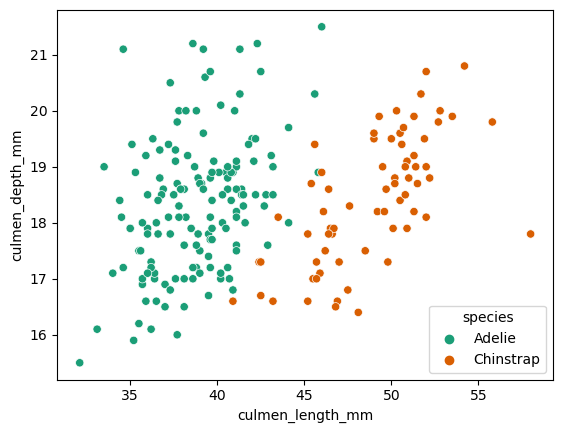

In [10]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


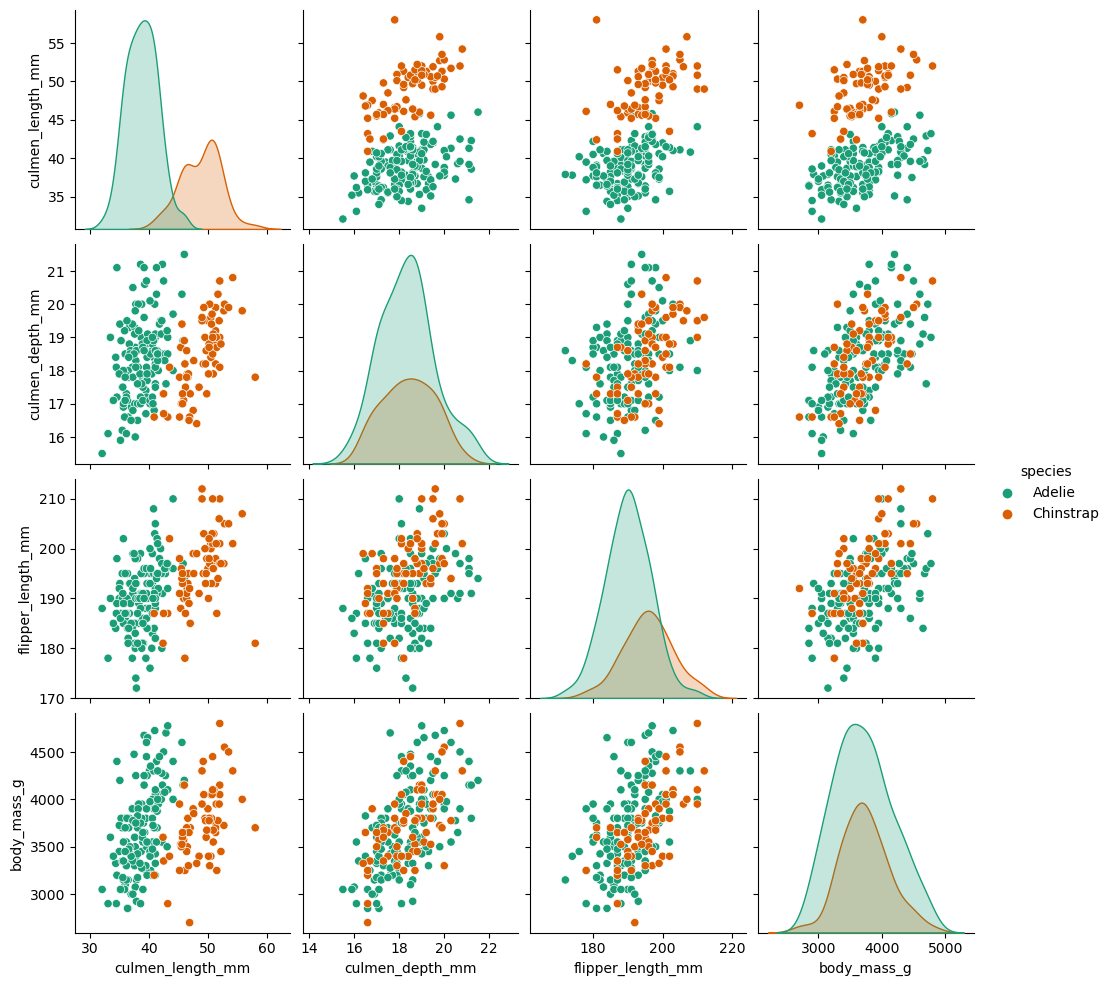

In [11]:
sns.pairplot(df,hue='species',palette='Dark2')

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


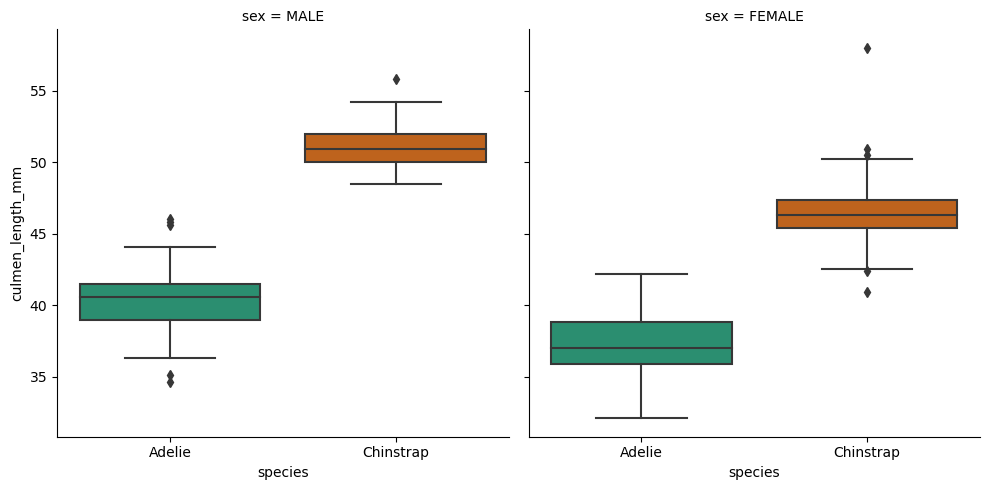

In [12]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

In [13]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
215,55.8,19.8,207.0,4000.0,False,True,False,True,False,False,True
216,43.5,18.1,202.0,3400.0,False,True,False,True,False,True,False
217,49.6,18.2,193.0,3775.0,False,True,False,True,False,False,True
218,50.8,19.0,210.0,4100.0,False,True,False,True,False,False,True


In [14]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
215,55.8,19.8,207.0,4000.0,True,False,True
216,43.5,18.1,202.0,3400.0,True,False,False
217,49.6,18.2,193.0,3775.0,True,False,True
218,50.8,19.0,210.0,4100.0,True,False,True


In [15]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [16]:

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=1)
print(y_train)

178    Chinstrap
166    Chinstrap
108       Adelie
198    Chinstrap
48        Adelie
         ...    
121       Adelie
134       Adelie
129       Adelie
27        Adelie
195    Chinstrap
Name: species, Length: 128, dtype: object


In [17]:
# Feature Scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [18]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [19]:
y_pred = log_model.predict(scaled_X_test)

accuracy_score(y_test,y_pred)

1.0

In [20]:

confusion_matrix(y_test,y_pred)

array([[31,  0],
       [ 0, 12]])

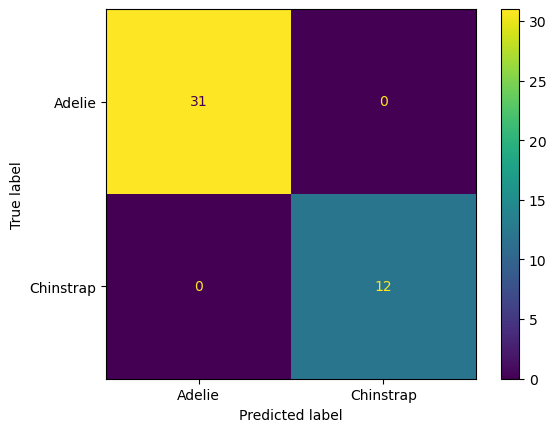

In [21]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        12

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [23]:
y_train_pred = log_model.predict(X_train)
train_report = classification_report(y_train, y_train_pred)
print("Training Set Performance:")
print(train_report)


Training Set Performance:
              precision    recall  f1-score   support

      Adelie       0.68      1.00      0.81        87
   Chinstrap       0.00      0.00      0.00        41

    accuracy                           0.68       128
   macro avg       0.34      0.50      0.40       128
weighted avg       0.46      0.68      0.55       128



/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-sco

In [24]:
y_test_pred = log_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print("Test Set Performance:")
print(test_report)

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Set Performance:
              precision    recall  f1-score   support

      Adelie       0.72      1.00      0.84        31
   Chinstrap       0.00      0.00      0.00        12

    accuracy                           0.72        43
   macro avg       0.36      0.50      0.42        43
weighted avg       0.52      0.72      0.60        43



/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
y_val_pred = log_model.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
print("Validation Set Performance:")
print(val_report)

Validation Set Performance:
              precision    recall  f1-score   support

      Adelie       0.65      1.00      0.79        28
   Chinstrap       0.00      0.00      0.00        15

    accuracy                           0.65        43
   macro avg       0.33      0.50      0.39        43
weighted avg       0.42      0.65      0.51        43



/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-sco